<a href="https://colab.research.google.com/github/hsiaopray/class/blob/master/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [44]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [45]:

trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

[6]


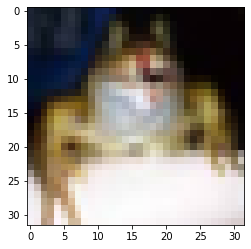

In [46]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
i = random.randint(0, 49999)
print(y_train[i])
plt.imshow(x_train[i])

In [47]:
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Dense, Flatten, Dropout

from tensorflow.keras.models import Sequential
layers = [
      # Param個數 = 3 * 3 * 3(一個過濾器) * 64(有這麼多個過濾器) + 64(bais)
      Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
      MaxPool2D(),
      # 3 * 3 * 64(一個過濾器) * 128(個) * 128(bais)
      Conv2D(128, 3, padding="same", activation="relu"),
      MaxPool2D(),
      # 3 * 3 * 128(一個過濾器) * 256(個) * 256(bais)
      Conv2D(256, 3, padding="same", activation="relu"),
      MaxPool2D(),
      Flatten(),
      Dense(256, activation="relu"),
      Dropout(0.25),
      Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)             

In [48]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [49]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [50]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
       ModelCheckpoint("cnn.h5", save_best_only=True),
       EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm, 
     y_train,
     batch_size=200,
     validation_split=0.1,
     epochs=50,
     verbose=2,
     callbacks = callbacks )

Epoch 1/50
225/225 - 2s - loss: 1.6076 - accuracy: 0.4108 - val_loss: 1.2866 - val_accuracy: 0.5298
Epoch 2/50
225/225 - 2s - loss: 1.1660 - accuracy: 0.5843 - val_loss: 1.0110 - val_accuracy: 0.6436
Epoch 3/50
225/225 - 2s - loss: 0.9539 - accuracy: 0.6627 - val_loss: 0.8373 - val_accuracy: 0.7032
Epoch 4/50
225/225 - 2s - loss: 0.8221 - accuracy: 0.7117 - val_loss: 0.8282 - val_accuracy: 0.7148
Epoch 5/50
225/225 - 2s - loss: 0.7313 - accuracy: 0.7448 - val_loss: 0.7538 - val_accuracy: 0.7406
Epoch 6/50
225/225 - 2s - loss: 0.6374 - accuracy: 0.7770 - val_loss: 0.7368 - val_accuracy: 0.7442
Epoch 7/50
225/225 - 2s - loss: 0.5660 - accuracy: 0.8030 - val_loss: 0.6898 - val_accuracy: 0.7638
Epoch 8/50
225/225 - 2s - loss: 0.4944 - accuracy: 0.8262 - val_loss: 0.6795 - val_accuracy: 0.7692
Epoch 9/50
225/225 - 2s - loss: 0.4400 - accuracy: 0.8466 - val_loss: 0.7023 - val_accuracy: 0.7712
Epoch 10/50
225/225 - 2s - loss: 0.3789 - accuracy: 0.8672 - val_loss: 0.6731 - val_accuracy: 0.7798

In [51]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7146 - accuracy: 0.7618


[0.7145651578903198, 0.7617999911308289]

In [52]:
pre = model.predict_classes(x_test_norm)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 8, 8, ..., 5, 4, 7])

In [53]:
print(pre.shape)
print(y_test.shape)
y_test_reshape = y_test.reshape(-1)
print(y_test_reshape.shape)

(10000,)
(10000, 1)
(10000,)


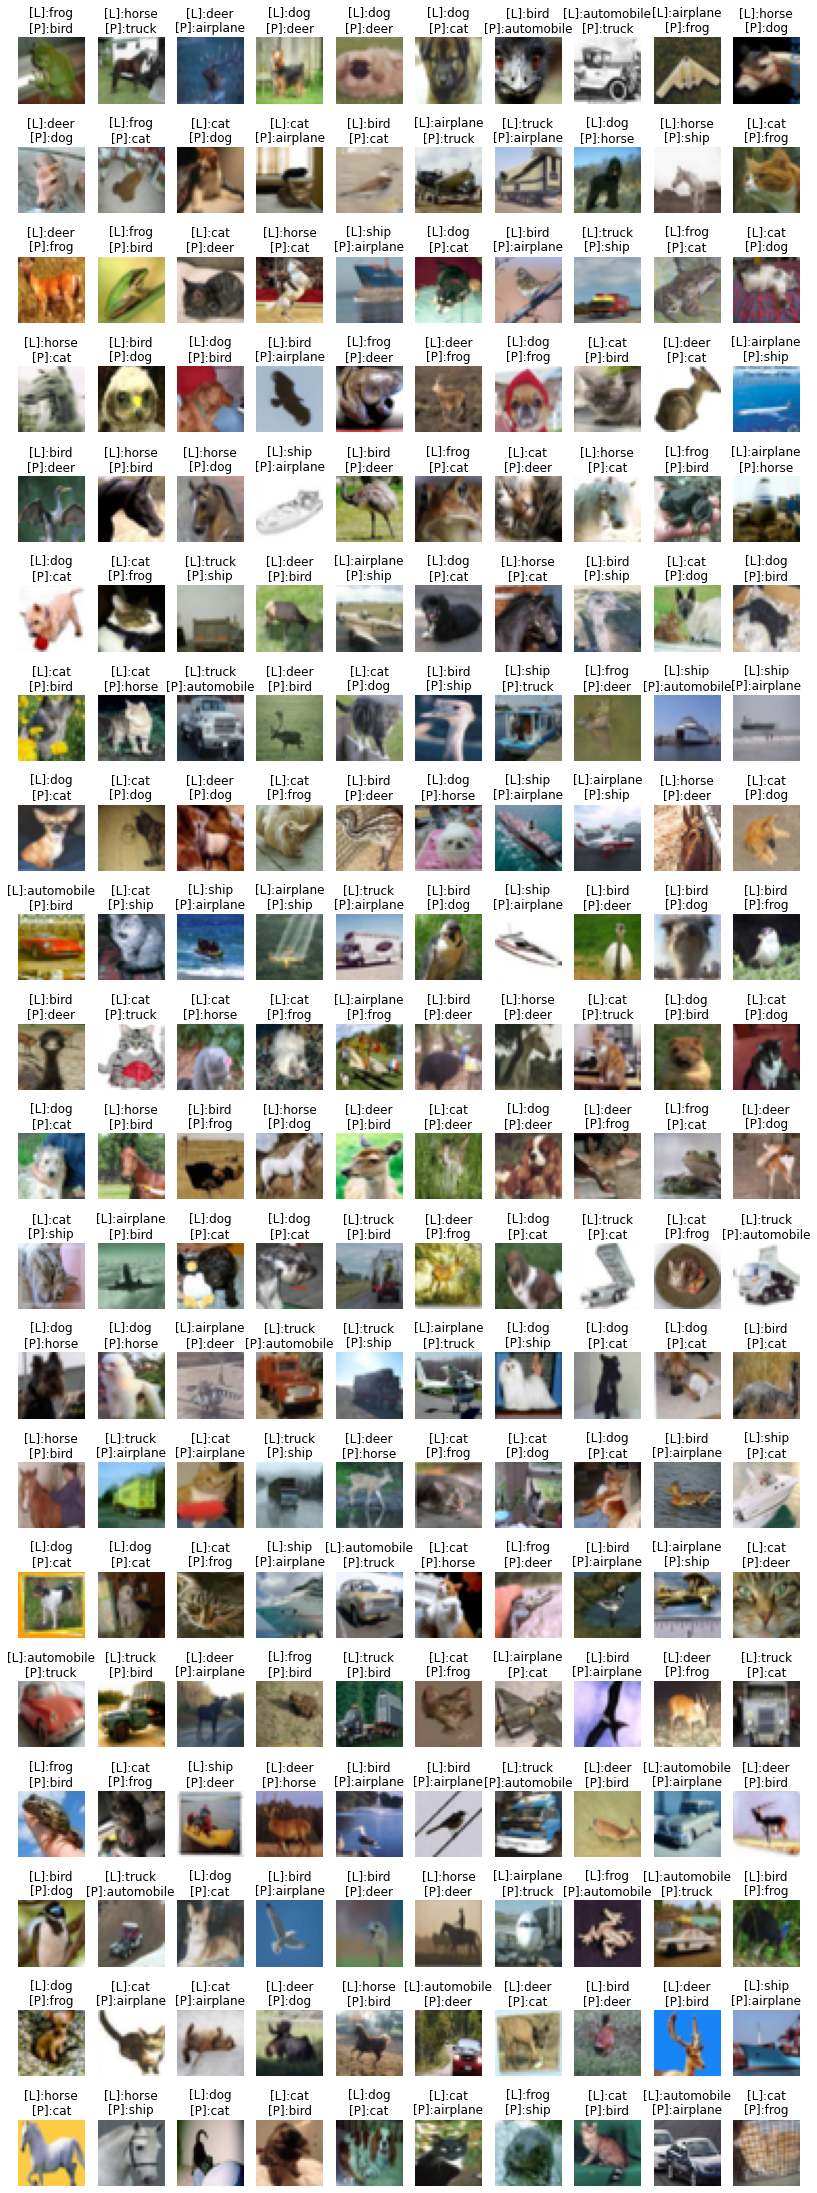

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14, 42))
idx = np.nonzero(pre != y_test_reshape)[0]
idx = idx[:200]
width = 10
height = len(idx) // width + 1
for i, d  in enumerate(idx):
    img, label, p = x_test[d], y_test_reshape[d], pre[d]
    t = "[L]:{}\n[P]:{}".format(trans[label], trans[p])
    plt.subplot(height, width, i+1)
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)

輸入網址:https://elt.rti.org.tw/wp-content/uploads/2020/06/960x540_learning-english-take-away-english-what-does-a-dog-mean-when-it-wags-its-tail-imagesgetty.jpg


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


airplane 的機率: 0.0
automobile 的機率: 0.0
bird 的機率: 0.68
cat 的機率: 0.04
deer 的機率: 0.17
dog 的機率: 0.11
frog 的機率: 0.01
horse 的機率: 0.0
ship 的機率: 0.0
truck 的機率: 0.0


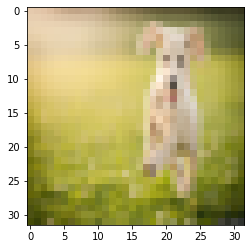

In [56]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img

url = input("輸入網址:")
# 純文字: stream不加, 檔案: stream=True
# verify=False 防火牆調低
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((32, 32))
img = np.array(img)
img_np = np.array(img).reshape(1, 32, 32, 3) / 255
pre = model.predict(img_np)[0]
for i in range(10):
    print(trans[i], "的機率:", round(pre[i], 2))
plt.imshow(np.array(img), cmap="Reds")